In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Data taken from here: https://www.kaggle.com/destring/metacritic-reviewed-games-since-2000
meta_games = pd.read_csv('metacritic.csv')
meta_games.head()

,metascore,name,console,userscore,date
0,97,Grand Theft Auto V,PS3,8.3,"Sep 17, 2013"
1,97,Grand Theft Auto V,X360,8.3,"Sep 17, 2013"
2,95,The Last of Us,PS3,9.2,"Jun 14, 2013"
3,94,BioShock Infinite,PS3,8.5,"Mar 26, 2013"
4,94,BioShock Infinite,PC,8.6,"Mar 25, 2013"


In [2]:
# Explore the data
print(meta_games.shape)
meta_games.dtypes

(15647, 5)


metascore     int64
name         object
console      object
userscore    object
date         object
dtype: object

In [3]:
# Convert userscore to float and date to datetime
meta_games.date = pd.to_datetime(meta_games.date)
meta_games.userscore = pd.to_numeric(meta_games.userscore, errors='coerce')
meta_games.dtypes

metascore             int64
name                 object
console              object
userscore           float64
date         datetime64[ns]
dtype: object

In [4]:
import plotly.plotly as py
import cufflinks as cf

cf.go_offline()

# Display Meta-Score vs User-Score for the highest rated games (Metacritic > 94)
high_scores = meta_games[meta_games.metascore > 94].pivot_table(index=["name"])

trace1 = cf.Bar(
    x=high_scores.index,
    y=high_scores.metascore,
    name='Meta-Score'
)
trace2 = cf.Bar(
    x=high_scores.index,
    y=(high_scores.userscore * 10),
    name='User-Score'
)

layout = cf.Layout(
    barmode='group',
    title='Metascore vs Userscore for Highest-Rated Games',
    yaxis=dict(
        range=[60, 100]
    )
)

fig = cf.Figure(data=[trace1,trace2], layout=layout)
cf.iplot(fig)

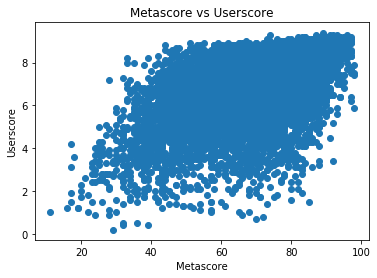

In [5]:
# Display relationship between Meta-Score and User-Score, with a Scatter Plot
plt.xlabel('Metascore')
plt.ylabel('Userscore')
plt.title('Metascore vs Userscore')
plt.scatter(x=meta_games.metascore, y=meta_games.userscore)

In [6]:
# Explore unique categories for consoles
meta_games.console.unique()

array(['PS3', 'X360', 'PC', 'WIIU', '3DS', 'PS4', 'VITA', 'XONE',
       'Switch', 'WII', 'DS', 'PSP', 'PS2', 'XBOX', 'GBA', 'N64', 'DC',
       'GC', 'PS', ' PC', ' VITA'], dtype=object)

In [7]:
# Clean some console values
meta_games.console = meta_games.console.str.replace(' PC', 'PC')
meta_games.console.unique()

array(['PS3', 'X360', 'PC', 'WIIU', '3DS', 'PS4', 'VITA', 'XONE',
       'Switch', 'WII', 'DS', 'PSP', 'PS2', 'XBOX', 'GBA', 'N64', 'DC',
       'GC', 'PS', ' VITA'], dtype=object)

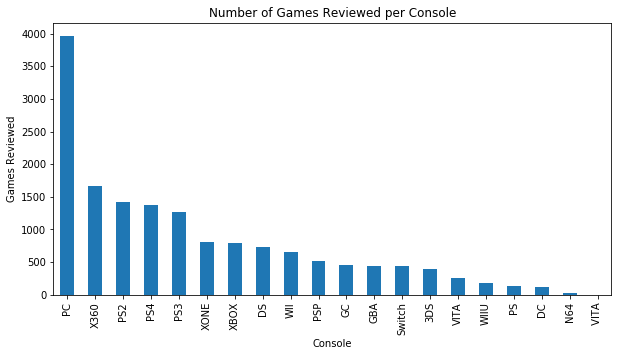

In [8]:
# Display total games reviewed by console, with a Bar Chart
plt.xlabel('Console')
plt.ylabel('Games Reviewed')
plt.title('Number of Games Reviewed per Console')
meta_games.console.value_counts().plot(kind='bar', figsize=(10,5))                      

In [9]:
# Create a new column for Meta-Score to User-Score ratio
meta_games['ratio'] = meta_games.metascore / (meta_games.userscore * 10)
meta_games.head()

,metascore,name,console,userscore,date,ratio
0,97,Grand Theft Auto V,PS3,8.3,2013-09-17,1.168675
1,97,Grand Theft Auto V,X360,8.3,2013-09-17,1.168675
2,95,The Last of Us,PS3,9.2,2013-06-14,1.032609
3,94,BioShock Infinite,PS3,8.5,2013-03-26,1.105882
4,94,BioShock Infinite,PC,8.6,2013-03-25,1.093023


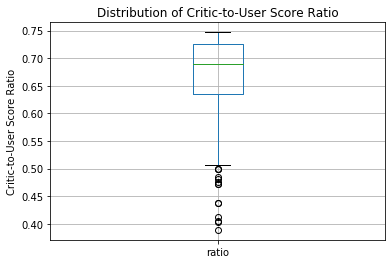

In [10]:
# Display distribution of games with ratio < 0.75, with a Box Plot
plt.title('Distribution of Critic-to-User Score Ratio')
plt.ylabel('Critic-to-User Score Ratio')
meta_games[meta_games.ratio < 0.75].boxplot(column='ratio')

In [11]:
# Define "underrated" games as those with (0.5 < ratio < 0.75) AND (User-Score > 8.0)
# These are games that have a HIGH user score but LOW critic score
underrated = meta_games[(((meta_games.ratio > 0.5)&(meta_games.ratio < 0.75))&(meta_games.userscore > 8.0))]

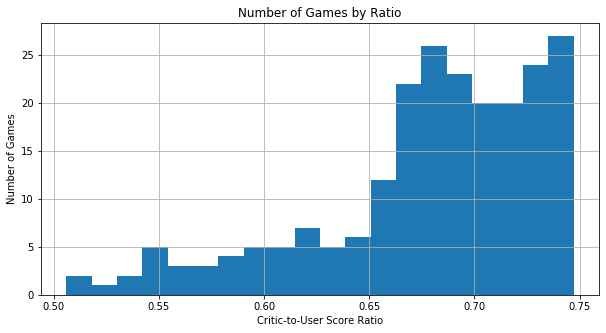

In [12]:
# Display distribution of "underrated" games by ratio, with a Histogram
plt.xlabel('Critic-to-User Score Ratio')
plt.ylabel('Number of Games')
plt.title('Number of Games by Ratio')
underrated.ratio.hist(bins=20, figsize=(10,5))

In [13]:
# Explore underrated games released in the last 10 years
underrated[underrated.date.dt.year > 2009].sort_values(by='ratio').reset_index()

,index,metascore,name,console,userscore,date,ratio
0,14163,47,Tom Clancy's HAWX 2,WII,8.5,2010-11-09,0.552941
1,14176,46,Starpoint Gemini,PC,8.3,2010-12-15,0.554217
2,14411,48,Otomedius Excellent,X360,8.1,2011-11-01,0.592593
3,14143,51,Racquet Sports,WII,8.6,2010-03-09,0.593023
4,13381,51,Immortal: Unchained,XONE,8.2,2018-09-07,0.621951
5,14139,52,TerRover,PS3,8.3,2010-09-07,0.626506
6,13277,54,I Heart Geeks!,DS,8.4,2011-12-20,0.642857
7,14130,53,Namco Museum Megamix,WII,8.2,2010-11-16,0.646341
8,14133,53,Toribash: Violence Perfected,WII,8.1,2010-07-12,0.654321
9,11173,56,Leisure Suit Larry: Reloaded,PC,8.3,2013-06-27,0.674699


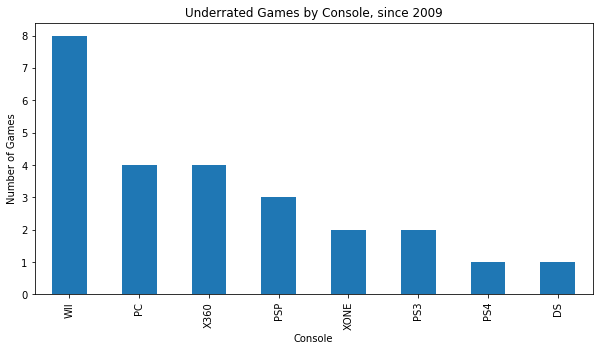

In [14]:
# Display distribution of underrated games released in the last 10 years by console, with a Bar-Chart
plt.xlabel('Console')
plt.ylabel('Number of Games')
plt.title('Underrated Games by Console, since 2009')
underrated[underrated.date.dt.year > 2009].console.value_counts().plot(kind='bar', figsize=(10,5)) 